In [15]:
''' Simulation of 2D Ising model. Tested on Python 3.10.6'''

' Simulation of 2D Ising model. Tested on Python 3.10.6'

## Introduction

Here I am going to present a project, simulating the 2D Ising model using Monte Carlo Simulation. 

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

The problem itself is defined on an $L = 10 \times 10 $grid, with a 100 spins pointing either up or down. The distribution of the spins on the grid is random, or all spins points upwards. I have defined a function, called __plotspins__, which visualize the grid

In [17]:
def plotspins(M,mode):
    plt.figure(figsize=(6,6))
    values = np.unique(M.ravel())
    
    im = plt.imshow(M, interpolation='none')
    colors = [ im.cmap(im.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label="Spin {l}".format(l=values[i]) ) for i in range(len(values)) ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    if(mode==1):
        plt.title('Randomozed sipns on grid')
    elif(mode==2):
        plt.title('Lattice after simulation')
    plt.grid(True)
    plt.xticks(ticks=np.linspace(0,9,10))
    plt.yticks(ticks=np.linspace(0,9,10))
    plt.show()

In [18]:

def initgrid(L = 10, allup=False, ifplot=True):

    M=np.zeros([L,L])
    for i in range(len(M)):
        for j in range(len(M)):
            ran=np.random.random()
            if(ran<0.5):  
                M[i,j] = 1
            else:
                if allup==False:
                    M[i,j] = -1
                else:
                    M[i,j] = 1
    if ifplot == True:
        plotspins(M,1)
    return M, L

To calculate __M__, the magnetisation, sum up all the spins and divide with the 'volume'

In [19]:
def calcMagnetization(M):
    spin = 0
    spin=np.sum(M)
    return spin/len(M)**2

I also wanted the model to stop after the quantities are not changing anymore relative to the average of the previous cycles.

In [20]:
def earlystopping(array, delta, index):
    index=index+index % 30
    data=np.array(array[index-index/10:])
    ave1=np.average(data)
    data2=np.array(array[index-index/30:])
    ave2=np.average(data2)
    if abs((ave2-ave1))<ave1/50:
        return True
    else:
        return False
    

I also needed a function to calculate the energy change for a given spin-flip.

In [21]:
def deltaE(S0, Sn, J, H):

  return 2 * S0 * (H + J * Sn)

The Hamiltonian for the Ising model is:
$$ H(\vec{\sigma}) = - J \sum_{<ij>} \sigma_i \sigma_j -h \sum_i \sigma_i$$ 
$J$ is the interaction strength and $h$ is the external magnetic field.<br>
Furthermore,
$$ P(\vec{\sigma}) = \dfrac{e^{-\beta H(\vec{\sigma})}}{Z} $$
where the partition function, Z is:
$$ Z = \sum_{ \{ \vec{\sigma} \} } e^{-\beta H(\vec{\sigma})}. $$





In [22]:
def isingmodel (
    n = 100,
    h = 1,
    K = 1, 
    kbT = 5,
    L = 10,
    M = np.zeros(10),
):
    
    Energy = 0
    for i in range(L):
        for j in range (L):
            Sn = M[(i - 1) % L, j] + M[(i + 1) % L, j] + M[i, (j - 1) % L] + M[i, (j + 1) % L]   
            Energy -= M[i,j]*(h+K*Sn)
    magnetization = []
    Energy=Energy/2
    energyHistory = []
    max=0
    
    for tstep in range(n):
        
        i=np.random.randint(10)
        j=np.random.randint(10)
        
        Sn = M[(i - 1) % L, j] + M[(i + 1) % L, j] + M[i, (j - 1) % L] + M[i, (j + 1) % L]
        
        dE= deltaE(M[i, j], Sn, K, h)
        
        if dE<0 or np.random.random()<np.exp(-dE/kbT):
            Energy+=dE
            M[i,j]=-1*M[i,j]
            
        energyHistory.append(Energy)
        magnetization.append(calcMagnetization(M)) 
        '''
        if tstep>100:
            if earlystopping(magnetization,0.1,tstep) == True:
                max=tstep
                break
    '''
    if max == 0:
        max=n
    numofave=int(max/10)
    return energyHistory, np.average(np.array(energyHistory[max-numofave:])) ,M, max, magnetization, np.average(np.array(magnetization[max-numofave:]))


        

Now that the model is defined, lets see an example.

Initialize Grid...


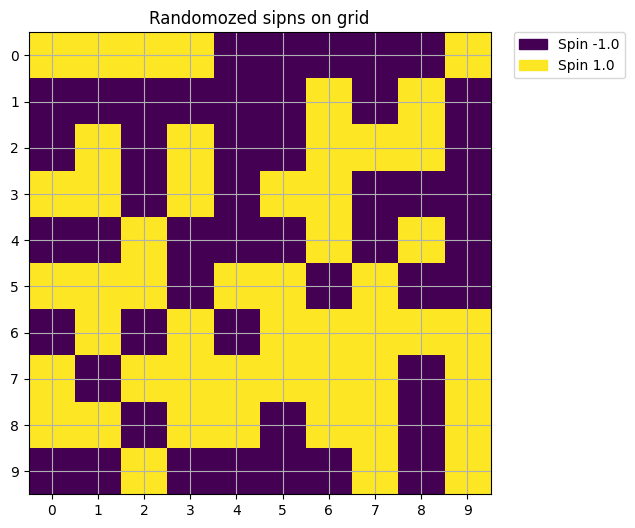

Grid initialized!
Start simulation...
Simulation successful!


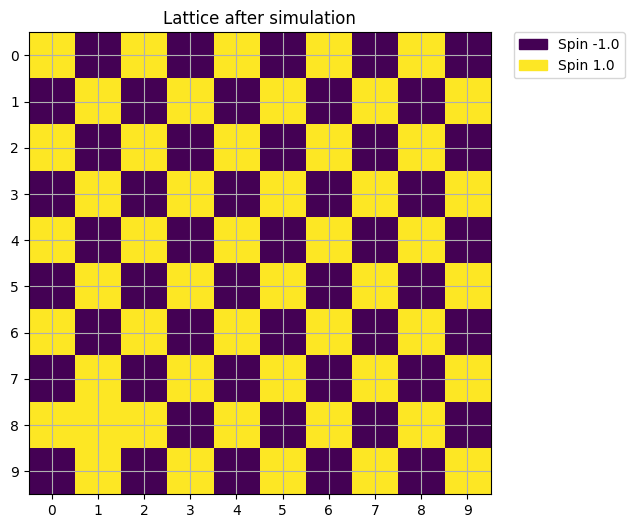

In [23]:
print('Initialize Grid...')
M, L = initgrid(10,False, True)
print('Grid initialized!')
print('Start simulation...')
Earr, Eave, Spins, steps, Marr, Mave = isingmodel(1000000,2,-1,1,10,M)
print('Simulation successful!')
plotspins(Spins,2)


Visualize energy, magnetization:

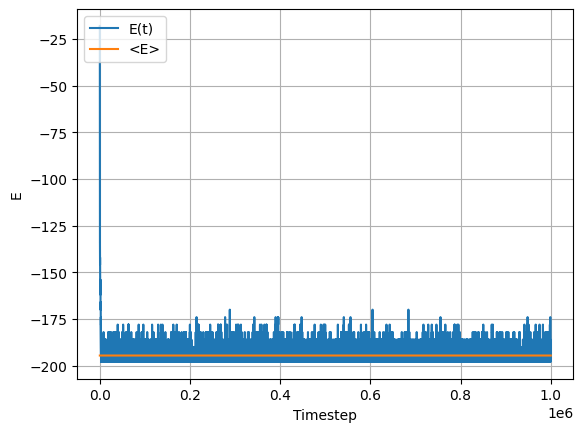

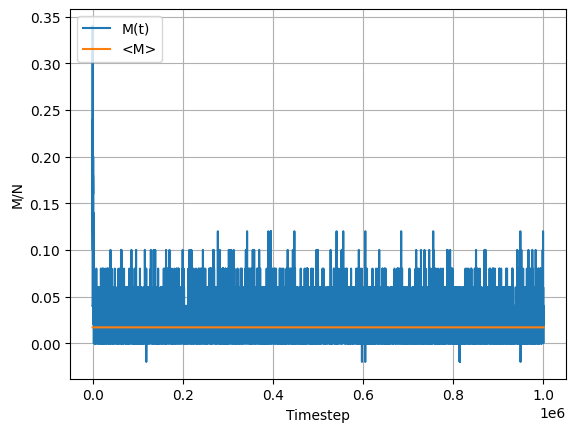

In [24]:
fig,ax = plt.subplots(1)


ax.plot(np.linspace(1,steps,steps), Earr, label='E(t)')
ax.plot(np.linspace(1,steps,steps), np.linspace(1,1,steps)*Eave, label='<E>')

handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]

ax.legend(handles,labels,loc=2)

plt.ylabel('E')
plt.xlabel('Timestep')
plt.grid(True)
plt.show()
fig,ax = plt.subplots(1)
ax.plot(np.linspace(1,steps,steps), Marr,label='M(t)')
ax.plot(np.linspace(1,steps,steps), np.linspace(1,1,steps)*Mave, label='<M>')
handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]

ax.legend(handles,labels,loc=2)
plt.ylabel('M/N')

plt.xlabel('Timestep')
plt.grid(True)
plt.show()

## Measure $\tau$ relaxation

The porposed method is to fit an exponential to the average magnetization. Every spin is 'up' at $t=0$.

Initialize Grid...


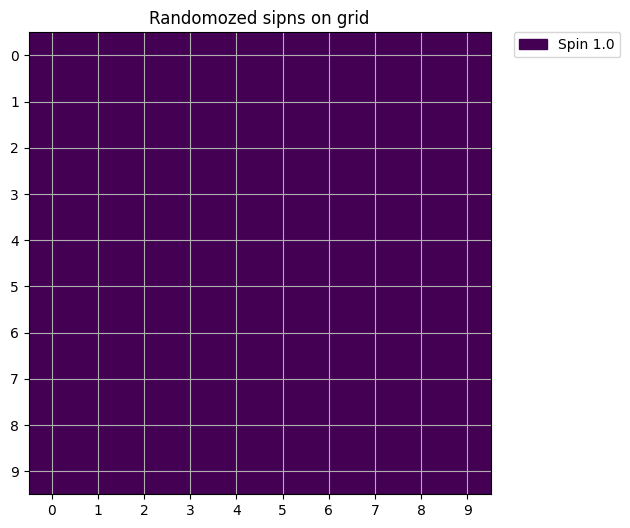

Grid initialized!
Start simulation...
Simulation successful!


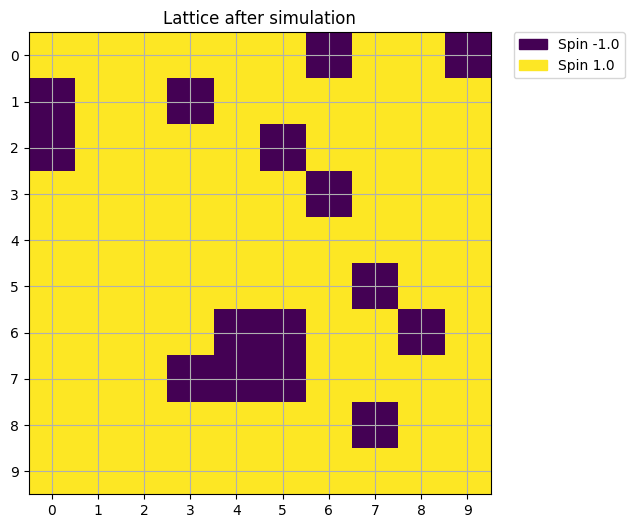

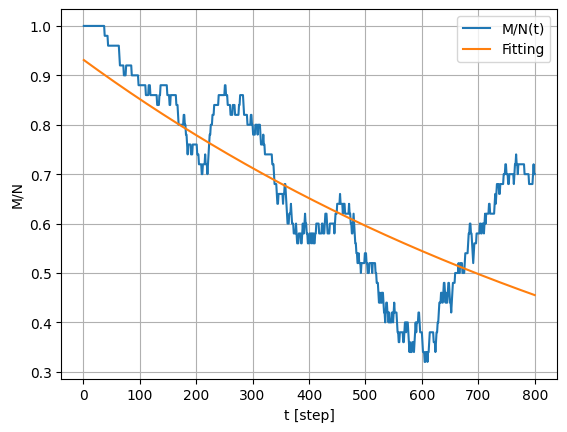

array([-0.00089542, -0.0706149 ])

In [26]:
print('Initialize Grid...')
M, L = initgrid(10,True, True)
print('Grid initialized!')
print('Start simulation...')
Earr, Eave, Spins, steps, Marr, Mave = isingmodel(800,1,1,5,L,M)
print('Simulation successful!')
plotspins(Spins,2)
poly=np.polyfit(np.linspace(1,steps,steps),np.log(Marr[:]),1)


fig,ax= plt.subplots(1)
ax.plot(np.linspace(1,steps,steps), Marr, label = 'M/N(t)')
ax.plot(np.linspace(1,steps,steps),np.exp(poly[0]*np.linspace(1,steps,steps)+poly[1]), label='Fitting')
plt.ylabel('M/N')

handles,labels=ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]
ax.legend(handles, labels)

plt.xlabel('t [step]')
plt.grid(True)
plt.show()
poly

## Measure varying h

In [27]:
ave1 = []
ave2 = []
ave3 = [] 
ave4 = []
ave5 = []#Array for the average magnetization for various kbT
H = []  #Array for the corresponding external field
for i in range(100):
    Grid, L = initgrid(10,True, False) #Init grid with all spins up
    h = np.random.random()*20-10 # Randomly select the external field in h=[-10, 10]
   
    Earr,Eave,Spins,steps, Marr, Mave = isingmodel(50000,h,1,2,L,Grid) #Monte Carlo simulation
    ave2.append(Mave)
    Grid, L = initgrid(10,True, False)
    Earr,Eave,Spins,steps, Marr, Mave = isingmodel(50000,h,1,3,L,Grid) #Monte Carlo simulation
    ave3.append(Mave)
    Grid, L = initgrid(10,True, False)
    Earr,Eave,Spins,steps, Marr, Mave = isingmodel(50000,h,1,4,L,Grid) #Monte Carlo simulation
    ave4.append(Mave)
    Grid, L = initgrid(10,True, False)
    Earr,Eave,Spins,steps, Marr, Mave = isingmodel(50000,h,1,5,L,Grid) #Monte Carlo simulation
    ave5.append(Mave)
    
    H.append(h) 

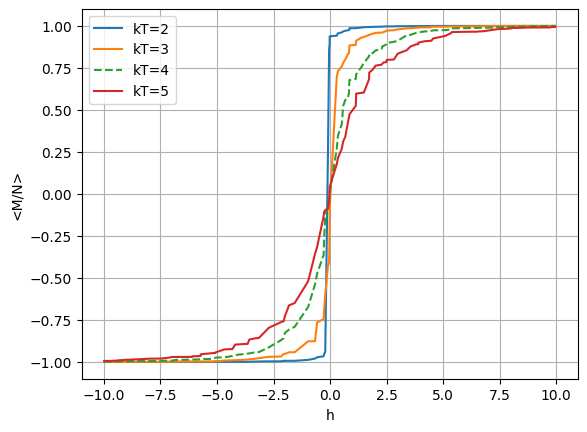

In [28]:
#Simple visualisation 

fig,ax = plt.subplots(1)

data=np.array([H,ave2])
data2=np.sort(data)
ax.plot(data2[0,:],data2[1,:],'-',label='kT=2')

data=np.array([H,ave3])
data2=np.sort(data)
ax.plot(data2[0,:],data2[1,:],'-',label='kT=3')

data=np.array([H,ave4])
data2=np.sort(data)
ax.plot(data2[0,:],data2[1,:],'--',label='kT=4')

data=np.array([H,ave5])
data2=np.sort(data)
ax.plot(data2[0,:],data2[1,:],'-',label='kT=5')

handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1], handles[2], handles[3]]
labels = [labels[0], labels[1], labels[2],labels[3],]

ax.legend(handles,labels,loc=2)

plt.xlabel('h')
plt.ylabel('<M/N>')
plt.grid(True)

# Discussion
* Large *h* means large external field, which makes the spins orient in the same direction (up), i.e. $\lim(M)_{h->{\infty}} = N$.
* With opposite *h*, the opposite orientation occurs - every spin down- (M is an odd function), and $\lim(M)_{h->{-\infty}} = -N$.
* At *h=0*, the interaction term dominates, resulting in $M=0$ (as many up spins as down).

# Susceptibility
The definition of the susceptibility is
$$ \chi = \frac{\partial M}{\partial h}$$ 
We evaluate the expression at $h=0$. I did it in two ways: using the central difference method, and simply fitting a line (slope -> derivative) for small h values. I start to discuss the latter, first: 

In [29]:
H=[]
ave=[]
full= []
#numrical method to approximate the derivative
for i in range(50):
    h=np.random.random()*0.1-0.05
    M, L = initgrid(10,True, False)
    Earr, Eave, Spin1,steps, Marr, Mave1 = isingmodel(1000000,h,1,5,L,M)
    full=full+Marr[steps-100000:]
    ave.append(Mave1)
    H.append(h)

In [30]:
for i in range(len(ave)):
    ave[i]=ave[i]*100 # M = (M/N)*N

58.91015732457581


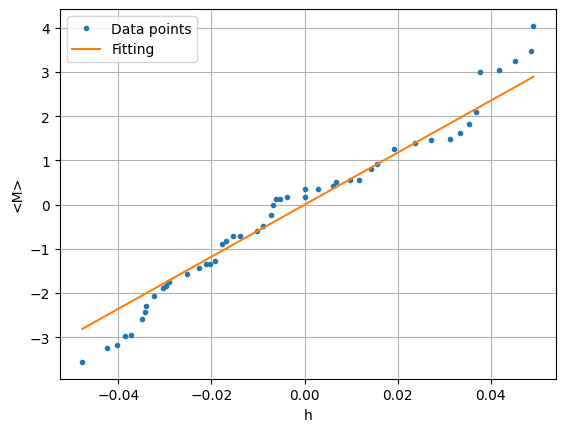

In [33]:

data=np.array([H,ave])
data2=np.sort(data)
poly=np.polyfit(H,ave,1)

fig,ax = plt.subplots(1)
ax.plot(data2[0,:],data2[1,:],'.', label = 'Data points')
ax.plot(data2[0,:], poly[0]*data2[0,:]+poly[1], label='Fitting')

handles,labels = ax.get_legend_handles_labels()
handles = [handles[0], handles[1]]
labels = [labels[0], labels[1]]

ax.legend(handles,labels,loc=2)
print(poly[0])
plt.grid(True)
plt.xlabel('h')
plt.ylabel('<M>')
plt.show()

Now lets check if

$$\chi = \left( \left< M^2\right>- \left<M\right>^2\right)\cdot \beta$$
holds. It is enough to calculate
$$Var(M)\cdot \beta$$

In [34]:

for i in range(len(full)):
    full[i]=full[i]*100
std=np.std(full)
var=std*std
chi=var/5 #kbT
print(chi)

57.87100112685797


So the proposed claim __holds__